Step 1: Loading and Visualizing the Data

            Unnamed: 0      NDVI
date                            
2010-01-01           0  0.361078
2010-01-17           1  0.445889
2010-02-02           2  0.458057
2010-02-18           3  0.441492
2010-03-06           4  0.390248


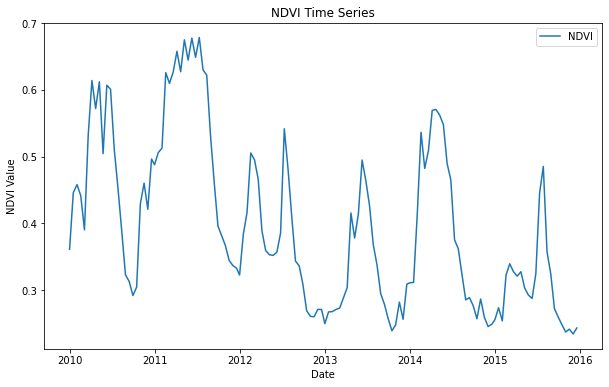

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the NDVI Data 
ndvi_df = pd.read_csv('/Users/zohaibahmed/Desktop/Courses/York University Courses /Research Methodologies/Final Project/average_ndvi.csv', parse_dates=['date'], index_col='date')


print(ndvi_df.head())

# Plotting the NDVI values to get a general understanding on how the values are spread out throughtout the years 
plt.figure(figsize=(10, 6))
plt.plot(ndvi_df.index, ndvi_df['NDVI'], label='NDVI')
plt.title('NDVI Time Series')
plt.xlabel('Date')
plt.ylabel('NDVI Value')
plt.legend()
plt.show()

This is the Average NDVI value whihc has been taken avaerage year by year and plotted in this line chart and  immediatley with this chart we can see that there is a decrease in the NDVI values as we progress down the years whihc isnt a good sign, this tells us as the years progress onwards we see a loss of vegation in this part of Brazil. with 2016 having the lowest drop and the highest NDVI value has been recorded in mid 2011 almost nearing at the 0.7 value range, since 2011's high we see a decline. we also have to account that few of the NDVI values ecorded by the terra satellite might include some varaince as the camera on the satellite might not accurtly pick up the image refelcted by the plant due to i.e; clouds,dust,particles. 

Step 2: Checking for Stationarity ( Integrated {d} ) 

Why is this important ? 

Checking for stationarity is a critical step in time series analysis, especially for models like ARIMA, because stationarity is a core assumption for these models to function effectively.

1. What is Stationarity?
A time series is stationary if its statistical properties, such as mean, variance, and autocorrelation, do not change over time. In other words:

The data doesn’t exhibit trends or seasonal patterns.
The overall structure of the series remains stable.

Consistent Statistical Properties: Stationarity ensures that the mean, variance, and autocorrelations are stable over time, allowing models to identify consistent patterns and relationships in the data.

Simplifies Modeling: Non-stationary data, especially with trends or seasonality, can introduce complexity, making it harder for models to distinguish between real patterns and noise.

Improves Forecast Accuracy: Non-stationary data can lead to inaccurate forecasts, as models may misinterpret trends or seasonal patterns as longer-term effects. Stationary data helps the model focus on relationships within the series rather than trying to model changes over time.

The ADF test helps ensure that your data meets the stationarity requirement for time series models like ARIMA, leading to more accurate and reliable forecasting.

In [3]:
from statsmodels.tsa.stattools import adfuller

# Performing the ADF test
result = adfuller(ndvi_df['NDVI'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


if result[1] < 0.05:
    print("Data is stationary")
else:
    print("Data is not stationary")


ADF Statistic: -2.6245553704783418
p-value: 0.08802762418573407
Data is not stationary


Based on the ADF test the we fail to reject the null hypothosis that the Data is stationary since our p value is greater than 0.05 

Step 3: Differencing to Make Data Stationary

What is Differencing?
Differencing is a technique used to remove trends or seasonality in time series data by subtracting the previous value from the current value. This process transforms the data, making it stationary by removing changes in the mean over time.

This parameter is the d term in the ARIMA model (ARIMA(p, d, q)).

ADF Statistic (Differenced): -10.25394958095794
p-value (Differenced): 4.411119020441521e-18


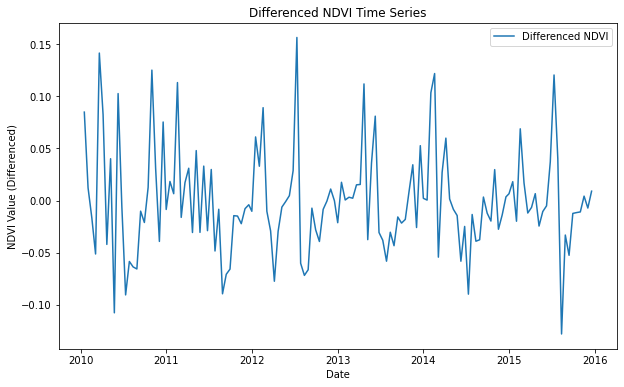

In [4]:
# Applying first order differencing
ndvi_df['NDVI_diff'] = ndvi_df['NDVI'] - ndvi_df['NDVI'].shift(1)
ndvi_df.dropna(inplace=True) 

# checking stationarity with ADF test on differenced data
result_diff = adfuller(ndvi_df['NDVI_diff'])
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])

# Plot differenced data
plt.figure(figsize=(10, 6))
plt.plot(ndvi_df.index, ndvi_df['NDVI_diff'], label='Differenced NDVI')
plt.title('Differenced NDVI Time Series')
plt.xlabel('Date')
plt.ylabel('NDVI Value (Differenced)')
plt.legend()
plt.show()


Now after applying first order differencing on the data we see our p-value is much smaller than 0.05 so now we know
the data has been differenced and the time series (such as mean and variance) is now stable over time.

Step 4: Selecting ARIMA Parameters (p, d, q)

/Users/zohaibahmed/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


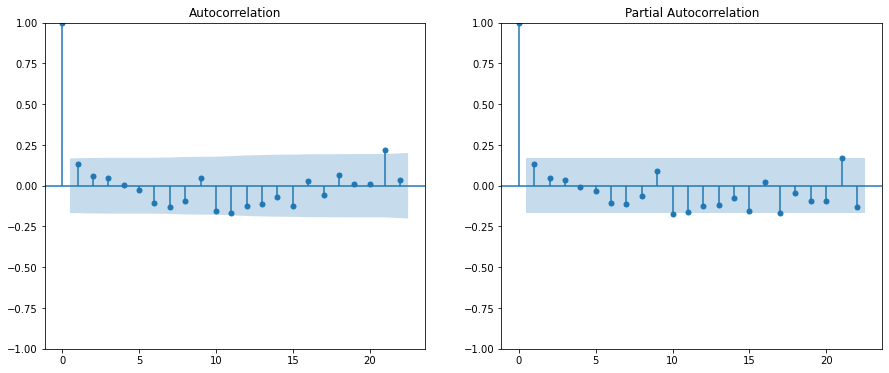

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting ACF and PACF for differenced data
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
plot_acf(ndvi_df['NDVI_diff'], ax=axes[0])
plot_pacf(ndvi_df['NDVI_diff'], ax=axes[1])
plt.show()


Autocorrelation Function (ACF) & Partial Autocorrelation Function (PACF)
    
The ACF plot shows the correlation of the differenced time series with itself at various lags.
Significant spikes in the ACF (values outside the blue confidence interval) at particular lags indicate strong correlation at those lags.
The first lag has a high correlation, while subsequent lags quickly drop and stay close to zero.

Partial Autocorrelation Function (PACF) Plot 
The PACF plot shows the correlation between the time series and its lagged values after removing the influence of intermediate lags.
There is a significant spike at lag 1, and the correlation decreases quickly after this.


Step 5: Fitting the ARIMA Model

In [6]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(ndvi_df['NDVI'], order=(1, 1, 1))  
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                   NDVI   No. Observations:                  137
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 216.406
Date:                Mon, 28 Oct 2024   AIC                           -426.812
Time:                        22:20:15   BIC                           -418.074
Sample:                             0   HQIC                          -423.261
                                - 137                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4461      0.543      0.821      0.411      -0.618       1.511
ma.L1         -0.3187      0.566     -0.563      0.573      -1.428       0.791
sigma2         0.0024      0.000     10.124      0.0

/Users/zohaibahmed/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zohaibahmed/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zohaibahmed/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Step 6: Making Forecasts

In [10]:
# Forecastoing the next 24 months? 
forecast = model_fit.forecast(steps=24)


print("Forecasted NDVI values:\n", forecast)


Forecasted NDVI values:
 125    0.293657
126    0.299510
127    0.304947
128    0.309998
129    0.314689
130    0.319047
131    0.323096
132    0.326856
133    0.330349
134    0.333594
135    0.336608
136    0.339408
137    0.342009
138    0.344425
139    0.346669
140    0.348754
141    0.350691
142    0.352489
143    0.354160
144    0.355713
145    0.357154
146    0.358494
147    0.359738
148    0.360894
Name: predicted_mean, dtype: float64


/Users/zohaibahmed/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Step 7: Evaluating the Model

In [14]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Split data into train and test sets (e.g., last 12 months for testing)
train = ndvi_df['NDVI'][:-24]
test = ndvi_df['NDVI'][-24:]

# Fit the model on the training data
model = ARIMA(train, order=(1, 1, 1))  # Update p, d, q as appropriate
model_fit = model.fit()

# Forecast the same length as the test set
forecast_test = model_fit.forecast(steps=24)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, forecast_test))
print(f"RMSE: {rmse}")


RMSE: 0.07364437763017119


/Users/zohaibahmed/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zohaibahmed/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zohaibahmed/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/zohaibahmed/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an

Step 8: Plotting Forecast vs. Actual Values

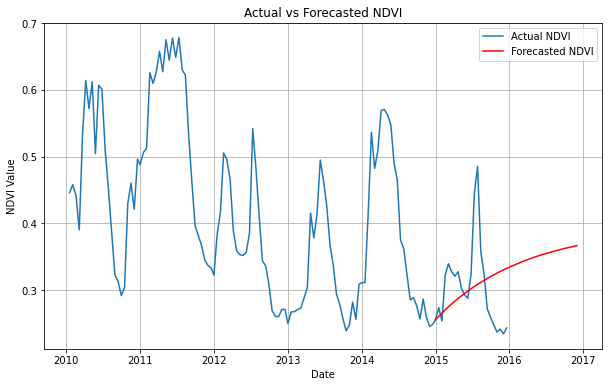

In [15]:
# Plot actual vs. forecasted values
plt.figure(figsize=(10, 6))
plt.plot(ndvi_df.index, ndvi_df['NDVI'], label='Actual NDVI')
forecast_index = pd.date_range(start=test.index[0], periods=24, freq='M')
plt.plot(forecast_index, forecast_test, label='Forecasted NDVI', color='red')
plt.title('Actual vs Forecasted NDVI')
plt.xlabel('Date')
plt.ylabel('NDVI Value')
plt.legend()
plt.grid(True)
plt.show()
